In [143]:
# imports
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.io import imread,imsave
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.morphology import binary_dilation,binary_erosion
%matplotlib inline

In [144]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

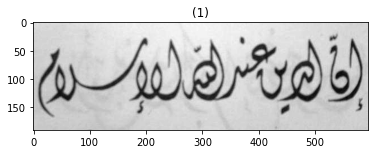

shape  (191, 595)


In [145]:
# read imahe and convert to Grey scale
img = imread("./ACDB/ACdata_base/1/0003.jpg", as_gray=True)
img = img.astype(np.float64) / np.max(img)
img = 255 * img
img = img.astype(np.uint8)
show_images([img])
print("shape ",img.shape)

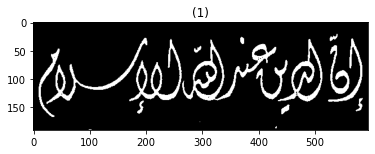

In [146]:
# binarization => this is the who;e text image 
t = sk.filters.threshold_local(img, 21, offset=10)
img = img < t
show_images([img])

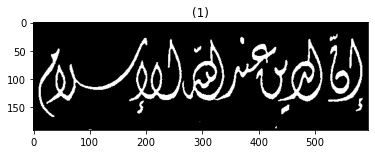

In [147]:
# remove noise 
img = binary_dilation(img)
img = binary_erosion(img)
show_images([img])

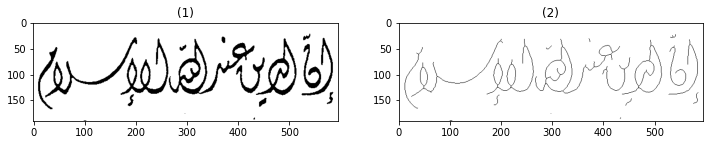

In [148]:
thin = sk.morphology.skeletonize(img)
thin = thin*1
thin = thin == 0
thin = thin*1
img = img == 0
show_images([img,thin])